<a href="https://colab.research.google.com/github/killerfrost22/killerfrost22.github.io/blob/main/Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Energy Crisis Texas 2021 Case Study**

### **Authors: Yizhan Ao, Youhan Dou, Haiwei Sun**

# **1. Background and motivation**

  On February 13-17 2021, a major winter and ice storm, also known as Winter Storm Uri,  had widespread impacts across the United States. (Axelrod) The winter storm resulted in a massive electricity failure across the state of Texas and left millions of homes and businesses without power. (Axelrod) In our research, we are seeking answers to how the land of fertile power Texas reached statewide power blackouts. By investigating the role of the Electric Reliability Council of Texas (ERCOT), we are trace-examining historical natural hazards in Texas to better understand what can be improved.

Using data pulled from ERCOT Website and peer-reviewed articles will help us better understanding the natural hazards, and the functionality of ERCOT, furthermore the transitions in Texas from Fossil fuel to greener energy. By doing such research we want to find out who should be led responsible for the power failure of this incident and why the 2021 Texas Power Crisis is a warning sign for the rest of the US power grid. The intended publishing place is at Diamondback, an independent student newspaper associated with the University of Maryland, discussing the Texas 2021 power crisis. The audience will be journalists, readers, and researchers furthermore people who are reviewing the power crisis incident.

# **2. Understanding and generalization of our project**


In this Project, solutions to our problems are straightforward: 
1. Identify the problem.
2. Find reasons behind the problem.
3. Solve the problem, if possible.


# **3. Resources and Implementation**


We have used energy generation data pulled from the ERCOT archive published right after the winter storm incident. Using python libraries including geopanda, altair, sklearn and shapely to better visualize data. Using data analysis tools from statistics classes, We have tested the confidence level of my theory. Using national archive and U.S. energy information administration aftermath review to cross-examine the liability and accuracy of our data-driven conclusion to the questions above.

### **Where is the data from: **
1. For power grid load and generation from the year 2021: 
http://www.ercot.com/content/wcm/lists/181766/IntGenbyFuel2021.xlsx
2. For power grid load and generation from the year 2007 to 2020:
http://www.ercot.com/content/wcm/lists/181766/FuelMixReport_PreviousYears.zip
2. For temperature of Texas Austin 2020-2021: 
https://www.meteoblue.com/en/weather/archive/export/austin_united-states-of-america_4671654


**How we conducted the process:**
1. Make sure the data files are in the same folder as your ipynb file
2. In your python script import your data files are libraries
3. Programming;)
4. Analyising the statistics and graphs
5. Compared to the data review afterwards to test our reliability

# **4. The body**

## **Case Study 1: A thought on the controversey governor's comment**

On Feb. 16th,  Greg Abbott, governor of Texas, directed the statewide power system failure towards frozen wind turbines.  
`“Our wind and our solar got shut down, and they were collectively more than 10 percent of our power grid, and that thrust Texas into a situation where it was lacking power on a statewide basis. ... It just shows that fossil fuel is necessary” (ABC News)`

The governor is not the only one who blames the energy failure on the greener energy. Rep. Dan Crenshaw (R-Tex.) shared similar blaming tweets of the way how the state’s grid failed, stating that fossil fuel and nuclear strength played — however extensively utilized the instant to assault wind power on Tuesday.(ABC News)

There are more examples online blaming greener energy on this issue ever since the start of the power blackouts. However the official team of the governor rejects his own claim towards the issue. All of these different claims made us think: Why is everyone telling a different story but people cannot conclude the reason solidifying the power grid keeps failing? Are the greener power generators that are unreliable towards an emergency breakdown? Are those comments trustworthy when they are coming from the politician instead of the managers or researchers who are in the industry? We have decided to find out the truth by myself among all of the words from the media and politicians.


In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings("ignore")
plt.style.use("ggplot")

Using a data frame structure we are trying to figure out what happened exactly during the time of 2021 winter crisis when the winter storm hit hardest time on Feb 10-13 and Feb 13-17

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
cp: cannot stat '/content/drive/MyDrive/drive/IntGenbyFuel2021.xlsx': No such file or directory


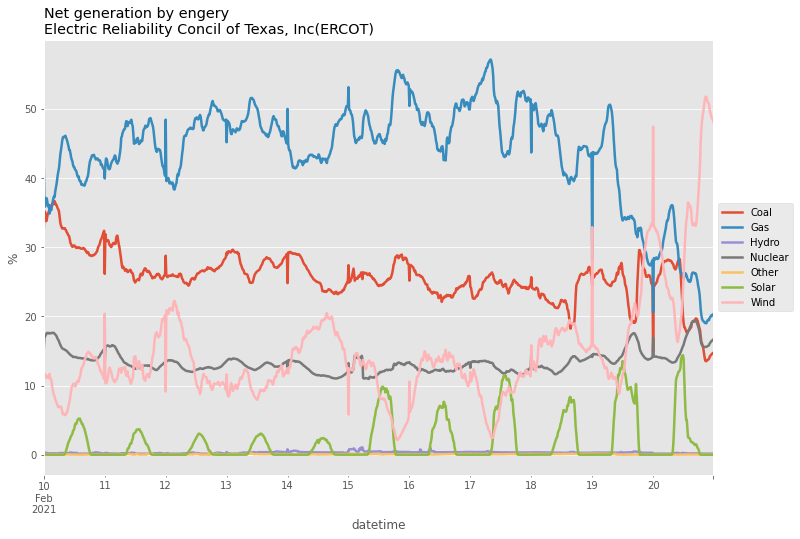

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
!cp /content/drive/MyDrive/drive/IntGenbyFuel2021.xlsx .

ercot_df = pd.read_excel("IntGenbyFuel2021.xlsx", sheet_name='Feb')
ercot_df = ercot_df.replace({
    'Gas-CC' : 'Gas',
    "Biomass": "Other"
})
ercot_df['Date'] = ercot_df['Date'].astype(str)
ercot_df = ercot_df[ercot_df.Date >= '2021-02-10']
ercot_df = ercot_df[ercot_df.Date <= '2021-02-20']
ercot_df['Date'] = ercot_df['Date'].astype(str)
ercot_df = (ercot_df.drop(columns=['Total'])
            .set_index(['Date','Fuel','Settlement Type'])
            .stack()
            .reset_index()
            .rename(columns={'level_3':'hour',0:'power'})
           )
ercot_df['datetime'] = pd.to_datetime(ercot_df['Date'] + ' ' + ercot_df['hour']).dt.tz_localize('America/Chicago')
ercot_df = ercot_df.drop(columns=['Date','hour','Settlement Type'])
ercot_df = ercot_df.pivot_table(index='datetime', columns='Fuel', values = ['power'])
ercot_df.columns = [i[1] for i in ercot_df.columns]
q1_plot = ercot_df.copy()
q1_plot = q1_plot.div(q1_plot.sum(axis=1), axis=0) * 100
q1_plot.plot(figsize = (12, 8), alpha = 5, lw = 2.5)
plt.title("Net generation by engery \nElectric Reliability Concil of Texas, Inc(ERCOT)",
         loc='left')
L = plt.ylabel('%')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.savefig("p1.png", dpi = 800)
plt.show()

`*(Figure 1)(*IntGenbyFuel2021.xlsx*) 

According to ERCOT energy generated by the fuel of the year 2020, we saw an estimation that Gas-CC(combined cycle) took 40% of the total generated power. The wind takes 23% of the total. Coal is 18%. Nuclear is 11%. Gas is 6%. Solar is 2%.  Others are rounded to 0%. All adds up to 100%. (Note: The numbers are estimation) 


We see a general trend of stable generation of nuclear that is around 15% during the extended length of Feb. 10th to 21st. Solar fluctuated from 0-10% which is understandable since there is no sunlight during the night. Solar has relatively low generation when the winter storm struck (Feb. 11-15). We saw a trend of a decreased coal power generation portion along with the timeline. The wind was struck on Feb 15 according to the graph, this is reasonable since wind turbines indeed are frozen for a while according to the report(ABC News). However, if we take a close eye on power generation by losses, we can tell the total generation is still stable, as more power generated by Gas-CC according to the power generation by Megawatt-Hours (ERCOT). When the wind power starts to collapse, the gas immediately takes up the portion lost by the wind(See figure 1) . This immediate loss of wind power is around 20,000 units. The power compensated by gas when the wind starts to fail is around 25,000 units. Governor Greg Abbott indeed made a point on wind power production loss. However, blaming the systematic failure of the whole power grid on wind power is not proper in this specific scenario. Wind fail is not the only part of the whole story.


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


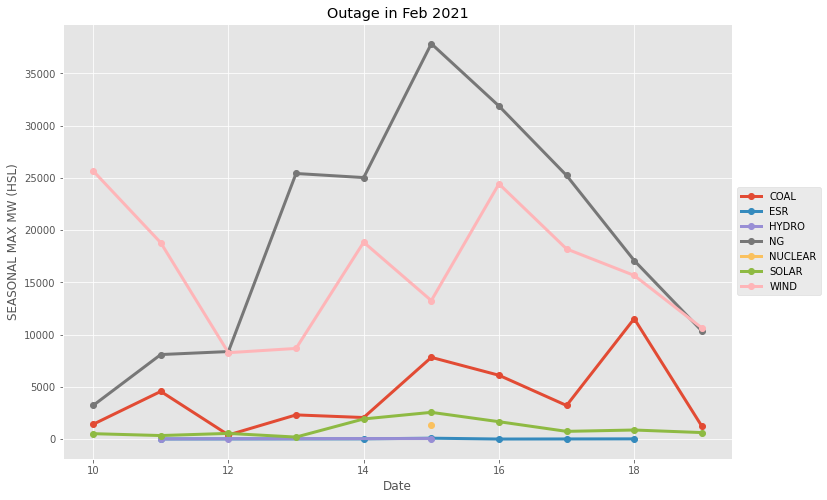

In [ ]:

from google.colab import drive
drive.mount('/content/drive')
!cp /content/drive/MyDrive/drive/Unit_Outage_Data_20210312.xlsx .
fies = "Unit_Outage_Data_20210312.xlsx"
data = pd.read_excel(fies, sheet_name="OutageData")
data['day'] = data.START.dt.day
plt.figure(figsize = (12, 8))
for i , g in data.groupby(['FUEL TYPE'] ):
    tp = g.groupby('day')['SEASONAL MAX MW (HSL)'].sum()
    plt.plot(tp.index, tp.values, label = i, alpha = 2,marker ='o', lw = 3)
plt.legend()
plt.title("Outage in Feb 2021")
plt.xlabel('Date')
plt.ylabel('SEASONAL MAX MW (HSL)')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.savefig("p3.png", dpi = 800)
plt.show()

`*(Figure 2)(*Unit_Outage_Data_20210312.xlsx*)*` 

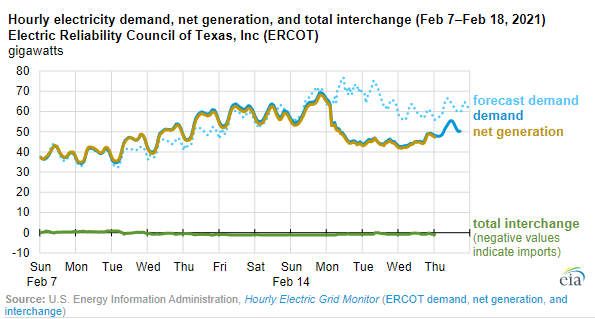

`(Figure 3)(https://www.eia.gov/todayinenergy/detail.php?id=46836)`

## Conclusion: Why is Texas "seconds and minutes" away from catastrophic blackouts?


According to the US energy information administration’s aftermath review on the incident, several elements made the sustainable constant power supply hard to generate. One, the increased demand of the total network is not fulfilled by the supply. (Morey) We saw a chasm of 30 gigawatts when the forecasted demand is required at peak(See figure 3). The total interchange is always 0. There will not be any import meaning all energy will be used to balance the grid meaning there is no import from other power providers except ERCOT. 

Secondly, the Natural gas wells withinside the place had been tormented by freezing temperatures which have disrupted production, and pipeline compressors have misplaced power, which have each decreased deliveries.(York 2021) Refineries in the area have halted production. These energy market disruptions continued for the next several days, and it indeed took more time to process for energy systems to resume normal operations shown in figure 4. The spike of the wind generation disproportionately increased to 50 percent while gas generation decreased. 

Natural gas is the most important supply of power generation in ERCOT, offering greater than 40,000 MW of delivery during top periods. Grid Monitor statistics display that natural gas-fired energy fell sharply as soon as ERCOT commenced enforcing rotating outages on February 15. Output from coal-fired plants, a nuclear facility, and wind farms all fell close to nighttime on February 15 and remained on the decrease level.

## Case Study 2: When history repeats itself again and again. 

In 1989, a similar arctic storm caused natural gas plants to have the same problems resulting in several rolling blackouts. The same thing happened again in the 2011 winter storm. During the 2011 Groundhog Day blizzard, Texas had confronted several comparable electricity outages because of frozen electricity equipment. (Douglas) 


At both times the federal commissions recommended that the utilities ensure reliability in the extreme weather conditions and specifically for the state regulators to create uniform standards for the winterization of natural gas production and processing facilities. The commission of Texas utilization did make those standards but also made them voluntary and most companies did not enforce the agenda. (VOX) 

Next, we are going to show how similar is the winter storm 2021 compared to the winter storm 2011.

2011_2012_p2.png

Draw the relationship between weather and electricity consumption

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
!cp /content/drive/MyDrive/2011_ERCOT_Hourly_Load_Data.csv .
!cp /content/drive/MyDrive/IntGenbyFuel2020.xlsx .
!cp /content/drive/MyDrive/2020weather.xlsx .
!cp /content/drive/MyDrive/2011weather.xlsx .
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
#read the weather and electricity consumption data from files
plt.rcParams['figure.figsize'] = [18,10]
data_2011=pd.read_csv('2011_ERCOT_Hourly_Load_Data.csv')
data_2020=pd.read_excel('IntGenbyFuel2020.xlsx')
weather_2020=pd.read_excel('2020weather.xlsx')

data_2011.head(10)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Hour_End        COAST  ...         WEST        ERCOT
0   1/1/2011 1:00  7242.844978  ...   943.943487  27662.44348
1   1/1/2011 2:00  7028.298944  ...   930.286207  27250.04472
2   1/1/2011 3:00  6870.407297  ...   922.040412  26783.22608
3   1/1/2011 4:00  6795.107575  ...   925.811668  26676.46849
4   1/1/2011 5:00  6758.472347  ...   937.992915  26868.80254
5   1/1/2011 6:00  6866.023825  ...   976.033504  27640.75506
6   1/1/2011 7:00  7146.596350  ...  1013.097028  28768.87887
7   1/1/2011 8:00  7341.066936  ...  1045.642428  29580.53511
8   1/1/2011 9:00  7552.407427  ...  1082.087198  30454.86027
9  1/1/2011 10:00  7716.584101  ...  1101.843927  31281.77572

[10 rows x 10 columns]

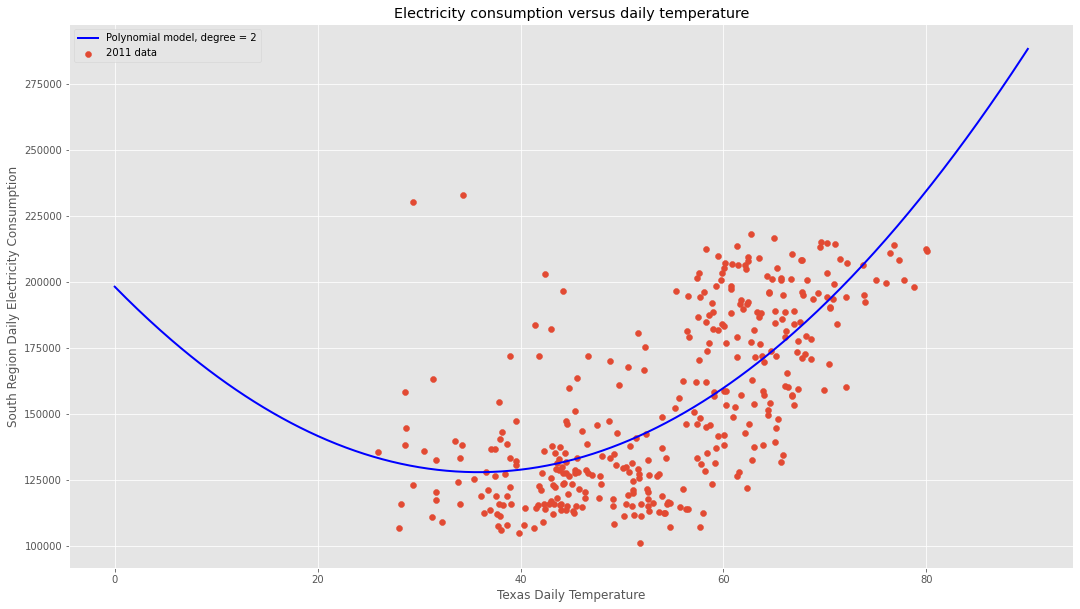

In [ ]:
#Do the Regression and Plot the data in 2011
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Ridge
model=make_pipeline(PolynomialFeatures(2), Ridge())
x=temp_2011['TEMP']
X=x[:, np.newaxis]
y=temp_2011['SOUTH_C']
model.fit(X,y)
x_plot = np.linspace(0,90,400)
X_plot = x_plot[:, np.newaxis]
y_plot = model.predict(X_plot)
plt.scatter(temp_2011['TEMP'],temp_2011['SOUTH_C'],label='2011 data')
plt.plot(x_plot, y_plot, color='blue', linewidth=2, label='Polynomial model, degree = 2')
plt.title('Electricity consumption versus daily temperature')
plt.xlabel('Texas Daily Temperature')
plt.ylabel('South Region Daily Electricity Consumption')
plt.legend()

In [ ]:
#Change the format from string to timestamp
data_2011['Hour_End']=data_2011['Hour_End'].apply(lambda x:dt.datetime.strptime(x,'%m/%d/%Y %H:%M'))
data_2011.index=data_2011['Hour_End']
data_2011=data_2011.drop('Hour_End',axis=1)
data_2011.head()

COAST        EAST  ...        WEST        ERCOT
Hour_End                                      ...                         
2011-01-01 01:00:00  7242.844978  919.318501  ...  943.943487  27662.44348
2011-01-01 02:00:00  7028.298944  906.680146  ...  930.286207  27250.04472
2011-01-01 03:00:00  6870.407297  877.968337  ...  922.040412  26783.22608
2011-01-01 04:00:00  6795.107575  863.683835  ...  925.811668  26676.46849
2011-01-01 05:00:00  6758.472347  888.934818  ...  937.992915  26868.80254

[5 rows x 9 columns]

In [ ]:
#get the south region electricity total use in 2011
data_2011_1=pd.DataFrame(columns=data_2011.columns.tolist())
month=0
day=0
for i in range(12):
  month=i+1
  for j in range(31):
    day=j+1
    try:
      date=dt.datetime(2011,month,day,0,0,0)
      data_2011_1.loc[dt.datetime(2011,month,day,0,0,0)]=data_2011[(data_2011.index.year==2011)&(data_2011.index.month==month)&(data_2011.index.day==day)].sum()
    except: 
      continue

data_2011_south=data_2011_1[['SOUTH_C']]
data_2011_south

SOUTH_C
2011-01-01  109240.535776
2011-01-02  132782.349145
2011-01-03  138339.873494
2011-01-04  123289.007948
2011-01-05  117411.699505
...                   ...
2011-12-27  140720.796717
2011-12-28  136712.410928
2011-12-29  130945.684497
2011-12-30  122392.115046
2011-12-31  115585.326389

[365 rows x 1 columns]

In [ ]:
#get the daily temperature of 2011 from weather excel and put them
#into weather_2011_1
weather_2011=pd.read_excel('2011weather.xlsx')
weather_2011.index=weather_2011['TIME']
weather_2011=weather_2011.drop('TIME',axis=1)
weather_2011_1=pd.DataFrame(columns=weather_2011.columns.tolist())
month=0
day=0
for i in range(12):
  month=i+1
  for j in range(31):
    day=j+1
    try:
      date=dt.datetime(2011,month,day,0,0,0)
      weather_2011_1.loc[dt.datetime(2011,month,day,0,0,0)]=weather_2011[(weather_2011.index.year==2011)&(weather_2011.index.month==month)&(weather_2011.index.day==day)].sum()
    except: 
      continue
#24 hours in a day, so divided by 24 to get the average
weather_2011_1['TEMP']/=24
weather_2011_1['HUMID']/=24
weather_2011_1['WINDSPEED']/=24
weather_2011_1['WINDDIRECTION']/=24
weather_2011_1

TEMP      HUMID  WINDSPEED  WINDDIRECTION
2011-01-01  32.223702  88.750000   2.911648     201.340063
2011-01-02  31.652202  86.875000   6.644729     202.102956
2011-01-03  28.583952  84.375000   5.663686     121.515937
2011-01-04  29.358702  85.375000   4.238834     168.666237
2011-01-05  31.625201  84.916667  11.517497     123.279515
...               ...        ...        ...            ...
2011-12-27  37.961201  83.333333   3.239384     192.724620
2011-12-28  37.499201  79.916667   5.637902     148.288946
2011-12-29  39.533951  83.500000  18.010193     259.122473
2011-12-30  38.966201  81.333333  31.835201     265.676733
2011-12-31  43.866701  85.375000  14.541014     227.088335

[365 rows x 4 columns]

In [ ]:
#Get the temperature from 2020 and put into weather_2020_1

weather_2020.index=weather_2020['TIME']
weather_2020=weather_2020.drop('TIME',axis=1)
weather_2020_1=pd.DataFrame(columns=weather_2020.columns.tolist())
month=0
day=0
for i in range(12):
  month=i+1
  for j in range(31):
    day=j+1
    try:
      date=dt.datetime(2020,month,day,0,0,0)
      weather_2020_1.loc[dt.datetime(2020,month,day,0,0,0)]=weather_2020[(weather_2020.index.year==2020)&(weather_2020.index.month==month)&(weather_2020.index.day==day)].sum()
    except: 
      continue
weather_2020_1['TEMP']/=24
weather_2020_1['HUMIDITY']/=24
weather_2020_1['WINDSPEED']/=24
weather_2020_1['WINDDIRECTION']/=24
weather_2020_1.head(10)

TEMP   HUMIDITY  WINDSPEED  WINDDIRECTION
2020-01-01  37.178950  76.916667   4.605330     131.498817
2020-01-02  39.629201  77.791667   5.957893     119.600648
2020-01-03  43.829951  76.041667  13.228733     188.830135
2020-01-04  43.157951  79.583333  13.784739     284.568530
2020-01-05  38.140451  81.083333   6.521416     139.566251
2020-01-06  37.060451  74.500000   8.438262     126.043545
2020-01-07  41.766701  75.958333   9.008176     233.464695
2020-01-08  41.606201  82.416667   6.824494     112.194031
2020-01-09  50.686452  67.666667   7.509622     146.094362
2020-01-10  47.024951  66.625000  19.252605     249.806045

In [ ]:
#put the temperature and electricity use together in 2011
temp_2011=data_2011_south.copy()
temp_2011['TEMP']=weather_2011_1['TEMP']
temp_2011.head()

SOUTH_C       TEMP
2011-01-01  109240.535776  32.223702
2011-01-02  132782.349145  31.652202
2011-01-03  138339.873494  28.583952
2011-01-04  123289.007948  29.358702
2011-01-05  117411.699505  31.625201

In [ ]:
#Begin to use 12 parts to get the total consumption in the 12 sheets
data01=pd.read_excel('IntGenbyFuel2020.xlsx',sheet_name='Jan')
data01.index=data01['Date']
data01=data01.drop('Date',axis=1)
#try to put the electricity use in different sheets together into data_2020_1
data_2020_1=pd.DataFrame(columns=data01.columns.tolist())
month=0
day=0
for i in range(12):
  month=i+1
  if i==0:
    data01=pd.read_excel('IntGenbyFuel2020.xlsx',sheet_name='Jan')
  elif i==1:
    data01=pd.read_excel('IntGenbyFuel2020.xlsx',sheet_name='Feb')
  elif i==2:
    data01=pd.read_excel('IntGenbyFuel2020.xlsx',sheet_name='Mar')
  elif i==3:
    data01=pd.read_excel('IntGenbyFuel2020.xlsx',sheet_name='Apr')
  elif i==4:
    data01=pd.read_excel('IntGenbyFuel2020.xlsx',sheet_name='May')
  elif i==5:
    data01=pd.read_excel('IntGenbyFuel2020.xlsx',sheet_name='Jun')
  elif i==6:
    data01=pd.read_excel('IntGenbyFuel2020.xlsx',sheet_name='Jul')
  elif i==7:
    data01=pd.read_excel('IntGenbyFuel2020.xlsx',sheet_name='Aug')
  elif i==8:
    data01=pd.read_excel('IntGenbyFuel2020.xlsx',sheet_name='Sep')
  elif i==9:
    data01=pd.read_excel('IntGenbyFuel2020.xlsx',sheet_name='Oct')
  elif i==10:
    data01=pd.read_excel('IntGenbyFuel2020.xlsx',sheet_name='Nov')
  else:
    data01=pd.read_excel('IntGenbyFuel2020.xlsx',sheet_name='Dec')
  data01.index=data01['Date']
  data01=data01.drop('Date',axis=1)
  for j in range(31):
    day=j+1
    try:
      #if date exists and is same as the date we want, then add
      date=dt.datetime(2020,month,day,0,0,0)
      data_2020_1.loc[dt.datetime(2020,month,day,0,0,0)]=data01[(data01.index.year==2020)&(data01.index.month==month)&(data01.index.day==day)].sum()
    except: 
      continue
data_2020_1

Fuel  ...          0:00
2020-01-01  BiomassCoalGasGas-CCHydroNuclearOtherSolarWind  ...   8751.531635
2020-01-02  BiomassCoalGasGas-CCHydroNuclearOtherSolarWind  ...   8743.815578
2020-01-03  BiomassCoalGasGas-CCHydroNuclearOtherSolarWind  ...   9278.026175
2020-01-04  BiomassCoalGasGas-CCHydroNuclearOtherSolarWind  ...   9182.095129
2020-01-05  BiomassCoalGasGas-CCHydroNuclearOtherSolarWind  ...   8465.469789
...                                                    ...  ...           ...
2020-12-27  BiomassCoalGasGas-CCHydroNuclearOtherSolarWind  ...   8433.151083
2020-12-28  BiomassCoalGasGas-CCHydroNuclearOtherSolarWind  ...   8689.033578
2020-12-29  BiomassCoalGasGas-CCHydroNuclearOtherSolarWind  ...   8494.975306
2020-12-30  BiomassCoalGasGas-CCHydroNuclearOtherSolarWind  ...  10004.991575
2020-12-31  BiomassCoalGasGas-CCHydroNuclearOtherSolarWind  ...  11036.569893

[366 rows x 99 columns]

In [ ]:
#put temperature and electricity use of 2020 together
temp_2020_1=data_2020_1[['Total']]
temp_2020=temp_2020_1.copy()
temp_2020['TEMP']=weather_2020_1['TEMP']
# temp_2020.head()

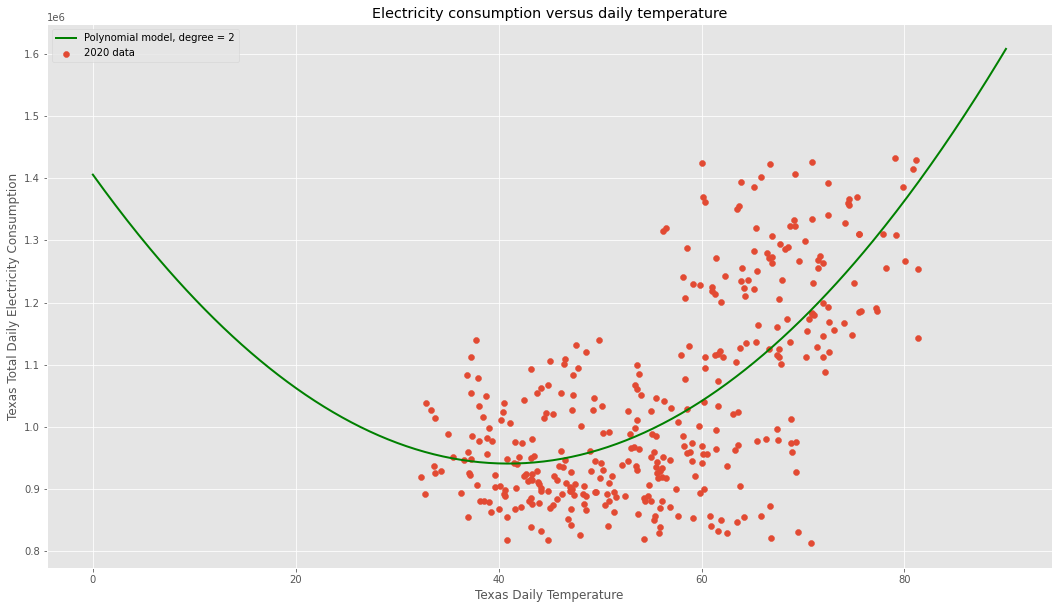

In [ ]:
#Do the Regression and Plot the data in 2020
model=make_pipeline(PolynomialFeatures(2), Ridge())
x=temp_2020['TEMP']
X=x[:, np.newaxis]
y=temp_2020['Total']
model.fit(X,y)
x_plot = np.linspace(0,90,400)
X_plot = x_plot[:, np.newaxis]
y_plot = model.predict(X_plot)
plt.scatter(temp_2020['TEMP'],temp_2020['Total'],label='2020 data')
plt.plot(x_plot, y_plot, color='Green', linewidth=2, label='Polynomial model, degree = 2')
plt.title('Electricity consumption versus daily temperature')
plt.xlabel('Texas Daily Temperature')
plt.ylabel('Texas Total Daily Electricity Consumption')
plt.legend()